# Advanced Time Series Analyses using the TERRA APIs

This notebook demonstrates how to perform advanced time series analyses on
TERRA data that are not directly available through the TERRA web dashboard.

By accessing the official TERRA APIs, the notebook enables customised queries
and analytical workflows on time series data, supporting reproducible and
transparent analysis.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

from terra_modules.terra_api import fetch_all_countries, fetch_time_series

## Time series analysis parameters

This section defines the main parameters used to query the TERRA Timeseries API.

The base payload specifies the subset of attributes to be
included in the time series extraction, such as partners, products,
and flow direction.

### Reference classifications for time series parameters

Some parameters used in the graph queries (e.g. countries, partners and products) are based on predefined classifications exposed by the TERRA API.

The following endpoints can be used to explore the available categories and
identify valid values to be passed to the `BASE_PAYLOAD`:

- **Time series - Partners**  
  https://api.terra.istat.it/cls/productsIntra?lang=en

- **Time series - products CPA**  
 https://api.terra.istat.it/cls/productsCPA?lang=en


In [ ]:
# Countries
countries = ["IT", "FR", "DE"]

# If you want to get all countries
# countries = fetch_all_countries()

# Define the request parameters
BASE_PAYLOAD = {
    "flow": 1,        # import = 1, export = 2
    "var": "00",      # product
    "partner": "AC",  # AC = "All countries"
    "dataType": 2,    # lag 12 months = 1, raw data = 2
    "tipovar": 1      # euro = 1, kg = 2
}


## Data retrieval from the TERRA Time Series API

In this step, time series data are retrieved directly from the TERRA Time Series API
for the selected set of countries and parameters.

The API is queried programmatically, and the individual country-level time series
are combined into a single tabular dataset for subsequent analysis.


In [3]:
df_time_series = fetch_time_series(BASE_PAYLOAD, countries)

## Time series visualisation

This section illustrates the temporal evolution of the selected time series
for the chosen set of countries.

For clarity, only countries with complete time coverage over the selected
period are displayed in the plot.


Time series start date: 2014-10
Time series end date  : 2025-09


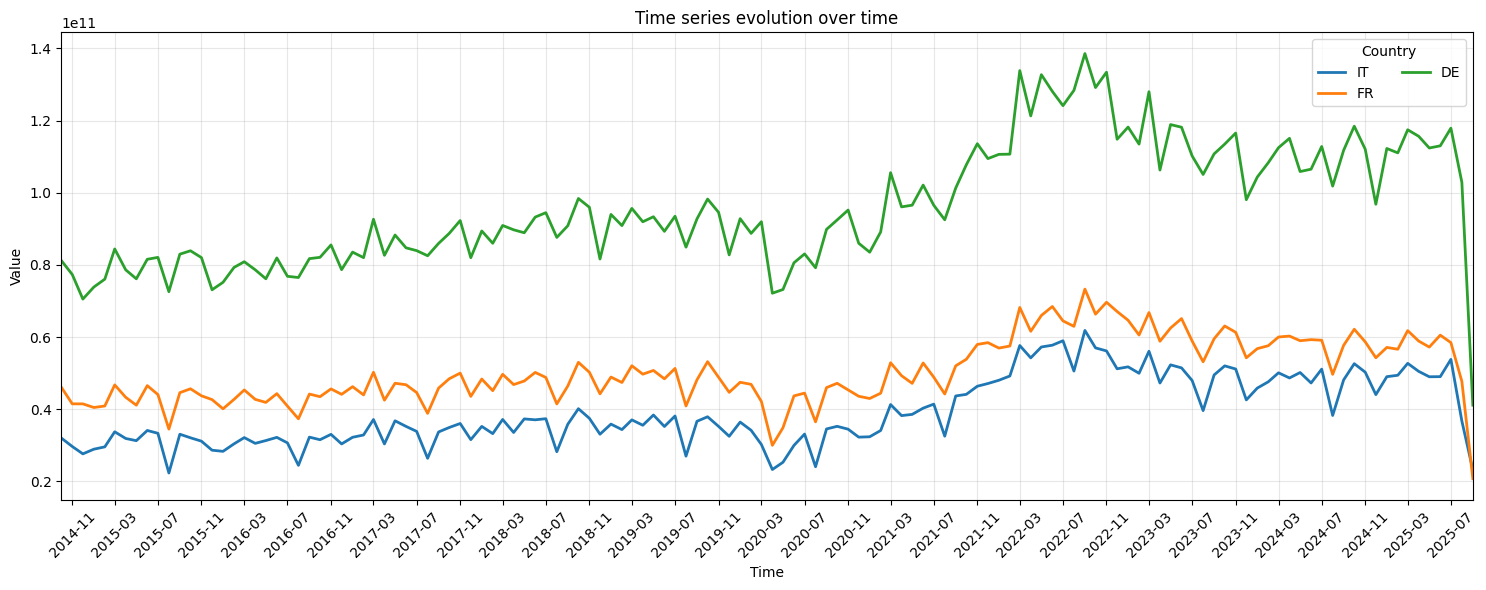

In [ ]:
# Identify the common time range
start_date = df_time_series["date"].min()
end_date = df_time_series["date"].max()

print(f"Time series start date: {start_date:%Y-%m}")
print(f"Time series end date  : {end_date:%Y-%m}")

# Prepare the plot
fig, ax = plt.subplots(figsize=(15, 6))

# Plot only countries with complete time coverage
for country in countries:
    df_c = df_time_series[df_time_series["country"] == country]

    if df_c["date"].nunique() == df_time_series["date"].nunique():
        ax.plot(
            df_c["date"],
            df_c["series"],
            label=country,
            linewidth=2
        )
    else:
        print(f"{country}: missing observations, not displayed")

# Axis formatting
ax.set_title("Time series evolution over time")
ax.set_xlabel("Time")
ax.set_ylabel("Value")

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))

ax.set_xlim(start_date, end_date)
ax.tick_params(axis="x", rotation=45)

ax.grid(True, alpha=0.3)
ax.legend(title="Country", ncol=2)

plt.tight_layout()
plt.show()
